In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
# 引入 支持向量机 Classify
from sklearn.svm import LinearSVC
# 引入数据集
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#添加噪声
x,y = make_moons(n_samples=100,noise=0.15)

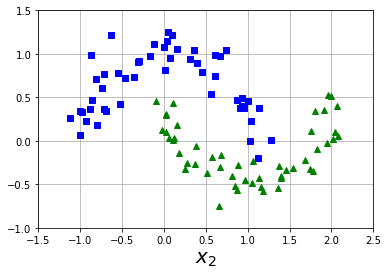

In [2]:
# 绘制两个数据集
def plot_df(x,y,axe):
    plt.plot(x[:, 0][y==1], x[:,1][y==1],'g^')
    plt.plot(x[:, 0][y==0], x[:,1][y==0],'bs')
    plt.axis(axe)
    # 绘制格子
    plt.grid(True,which='both')
    plt.xlabel(r'$x_1$',fontsize=20)
    plt.xlabel(r'$x_2$',fontsize=20,rotation=0)

plot_df(x,y,[-1.5,2.5,-1,1.5])

In [3]:
polynomial_svm_clf = Pipeline((
    ('poly_feature',PolynomialFeatures(degree=3)),
    # 数据的归一化
    ('scaler',StandardScaler()),
    # 支持向量机线性分类LinearSVC模型
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
))

polynomial_svm_clf.fit(x,y)

Pipeline(steps=[('poly_feature', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

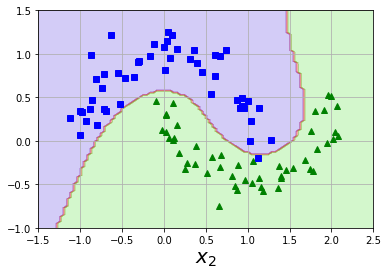

In [4]:
def plot_prediction(clf,axes):
    # x轴切分
    x0s = np.linspace(axes[0],axes[1],100)
    # y轴切分,分辨率100*100
    x1s = np.linspace(axes[2],axes[3],100)
    #预测特征
    x0,x1 = np.meshgrid(x0s,x1s)
    #交叉合并
    x = np.c_[x0.ravel(),x1.ravel()]
    #分类预测结果
    pred = clf.predict(x).reshape(x0.shape)

    # 绘制决策边界,cmap 表示
    plt.contourf(x0,x1,pred,cmap=plt.cm.brg,alpha=0.2)

plot_prediction(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_df(x,y,[-1.5,2.5,-1,1.5])